In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [19]:
observation = 10000
xs = np.random.uniform(-10, 10, (observation,1))
zs = np.random.uniform(-10, 10, (observation,1))
generated_inputs = np.column_stack((xs, zs))
noise = np.random.uniform(-1,1,(observation,1))
generated_targets = 2*xs-3*zs+5+noise
np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [20]:
training_data = np.load('TF_intro.npz')

input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)


Epoch 1/100
313/313 - 0s - loss: 3.4481
Epoch 2/100
313/313 - 0s - loss: 0.3509
Epoch 3/100
313/313 - 0s - loss: 0.3492
Epoch 4/100
313/313 - 0s - loss: 0.3499
Epoch 5/100
313/313 - 0s - loss: 0.3504
Epoch 6/100
313/313 - 0s - loss: 0.3506
Epoch 7/100
313/313 - 0s - loss: 0.3507
Epoch 8/100
313/313 - 0s - loss: 0.3520
Epoch 9/100
313/313 - 0s - loss: 0.3510
Epoch 10/100
313/313 - 0s - loss: 0.3488
Epoch 11/100
313/313 - 0s - loss: 0.3490
Epoch 12/100
313/313 - 0s - loss: 0.3493
Epoch 13/100
313/313 - 0s - loss: 0.3488
Epoch 14/100
313/313 - 0s - loss: 0.3501
Epoch 15/100
313/313 - 1s - loss: 0.3485
Epoch 16/100
313/313 - 0s - loss: 0.3497
Epoch 17/100
313/313 - 1s - loss: 0.3502
Epoch 18/100
313/313 - 0s - loss: 0.3507
Epoch 19/100
313/313 - 1s - loss: 0.3501
Epoch 20/100
313/313 - 1s - loss: 0.3501
Epoch 21/100
313/313 - 0s - loss: 0.3487
Epoch 22/100
313/313 - 1s - loss: 0.3514
Epoch 23/100
313/313 - 0s - loss: 0.3498
Epoch 24/100
313/313 - 0s - loss: 0.3502
Epoch 25/100
313/313 - 0s

In [21]:
model.layers[0].get_weights()

[array([[ 2.028879 ],
        [-2.9735465]], dtype=float32),
 array([4.994383], dtype=float32)]

In [22]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.028879 ],
       [-2.9735465]], dtype=float32)

In [23]:
bias = model.layers[0].get_weights()[1]
bias


array([4.994383], dtype=float32)

In [24]:
model.predict_on_batch(training_data['inputs'])

array([[ 21.641253],
       [-38.8153  ],
       [ 18.560913],
       ...,
       [ -4.714963],
       [  6.83646 ],
       [-12.620993]], dtype=float32)

In [25]:
np.squeeze(model.predict_on_batch(training_data["inputs"]))

array([ 21.641253, -38.8153  ,  18.560913, ...,  -4.714963,   6.83646 ,
       -12.620993], dtype=float32)

Text(0, 0.5, 'Targets')

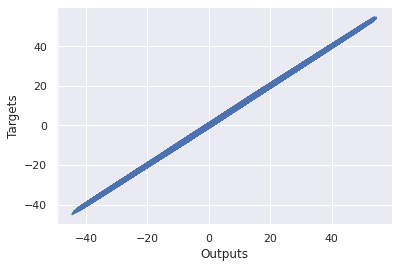

In [26]:
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
